In [22]:
import tensorflow as tf
import numpy as np

In [23]:
class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()
        # MNIST中的图像默认为uint8（0-255的数字）。以下代码将其归一化到0-1之间的浮点数，并在最后增加一维作为颜色通道
        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)        # [10000, 28, 28, 1]
        self.train_label = self.train_label.astype(np.int32)    # [60000]
        self.test_label = self.test_label.astype(np.int32)      # [10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]

    def get_batch(self, batch_size):
        # 从数据集中随机取出batch_size个元素并返回
        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]

In [24]:
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()    # Flatten层将除第一维（batch_size）以外的维度展平
        self.dense1 = tf.keras.layers.Dense(units=100, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):         # [batch_size, 28, 28, 1]
        x = self.flatten(inputs)    # [batch_size, 784]
        x = self.dense1(x)          # [batch_size, 100]
        x = self.dense2(x)          # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

In [25]:
num_epochs = 5
batch_size = 50
learning_rate = 0.001
model = MLP()
data_loader = MNISTLoader()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [26]:
    num_batches = int(data_loader.num_train_data // batch_size * num_epochs)
    for batch_index in range(num_batches):
        X, y = data_loader.get_batch(batch_size)
        with tf.GradientTape() as tape:
            y_pred = model(X)
            loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_pred)
            loss = tf.reduce_mean(loss)
            print("batch %d: loss %f" % (batch_index, loss.numpy()))
        grads = tape.gradient(loss, model.variables)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))

batch 0: loss 2.329427
batch 1: loss 2.362190
batch 2: loss 2.207111
batch 3: loss 2.051043
batch 4: loss 2.182029
batch 5: loss 1.916332
batch 6: loss 1.878353
batch 7: loss 1.860773
batch 8: loss 1.649111
batch 9: loss 1.753576
batch 10: loss 1.643806
batch 11: loss 1.731534
batch 12: loss 1.563547
batch 13: loss 1.574648
batch 14: loss 1.340896
batch 15: loss 1.404472
batch 16: loss 1.425071
batch 17: loss 1.278904
batch 18: loss 1.397158
batch 19: loss 1.236835
batch 20: loss 1.037868
batch 21: loss 1.132460
batch 22: loss 1.045675
batch 23: loss 1.023063
batch 24: loss 0.967686
batch 25: loss 1.024531
batch 26: loss 1.028589
batch 27: loss 1.099875
batch 28: loss 1.090176
batch 29: loss 0.955388
batch 30: loss 0.880249
batch 31: loss 0.783054
batch 32: loss 0.846754
batch 33: loss 0.865495
batch 34: loss 0.769793
batch 35: loss 0.765490
batch 36: loss 0.880485
batch 37: loss 0.731600
batch 38: loss 0.868457
batch 39: loss 0.671707
batch 40: loss 0.660238
batch 41: loss 0.656412
ba

batch 373: loss 0.266531
batch 374: loss 0.100525
batch 375: loss 0.176451
batch 376: loss 0.200449
batch 377: loss 0.393391
batch 378: loss 0.168207
batch 379: loss 0.232857
batch 380: loss 0.201577
batch 381: loss 0.268202
batch 382: loss 0.213311
batch 383: loss 0.281376
batch 384: loss 0.424130
batch 385: loss 0.465817
batch 386: loss 0.326611
batch 387: loss 0.312555
batch 388: loss 0.205224
batch 389: loss 0.262512
batch 390: loss 0.521643
batch 391: loss 0.249544
batch 392: loss 0.321257
batch 393: loss 0.270801
batch 394: loss 0.206474
batch 395: loss 0.299436
batch 396: loss 0.319898
batch 397: loss 0.506526
batch 398: loss 0.263458
batch 399: loss 0.312968
batch 400: loss 0.345524
batch 401: loss 0.151584
batch 402: loss 0.199796
batch 403: loss 0.359337
batch 404: loss 0.328266
batch 405: loss 0.311080
batch 406: loss 0.348963
batch 407: loss 0.276917
batch 408: loss 0.228185
batch 409: loss 0.459139
batch 410: loss 0.329400
batch 411: loss 0.421571
batch 412: loss 0.250221


batch 711: loss 0.099226
batch 712: loss 0.257622
batch 713: loss 0.278489
batch 714: loss 0.232496
batch 715: loss 0.172945
batch 716: loss 0.264755
batch 717: loss 0.114329
batch 718: loss 0.285514
batch 719: loss 0.217589
batch 720: loss 0.133252
batch 721: loss 0.084053
batch 722: loss 0.144949
batch 723: loss 0.316043
batch 724: loss 0.112268
batch 725: loss 0.226451
batch 726: loss 0.310680
batch 727: loss 0.198744
batch 728: loss 0.246386
batch 729: loss 0.211942
batch 730: loss 0.158993
batch 731: loss 0.212286
batch 732: loss 0.109059
batch 733: loss 0.244564
batch 734: loss 0.592103
batch 735: loss 0.154758
batch 736: loss 0.232897
batch 737: loss 0.213153
batch 738: loss 0.424728
batch 739: loss 0.407439
batch 740: loss 0.231534
batch 741: loss 0.197933
batch 742: loss 0.118955
batch 743: loss 0.173717
batch 744: loss 0.184528
batch 745: loss 0.222223
batch 746: loss 0.177162
batch 747: loss 0.102318
batch 748: loss 0.162393
batch 749: loss 0.191614
batch 750: loss 0.218676


batch 1048: loss 0.170922
batch 1049: loss 0.134205
batch 1050: loss 0.178927
batch 1051: loss 0.269523
batch 1052: loss 0.370723
batch 1053: loss 0.080462
batch 1054: loss 0.375395
batch 1055: loss 0.244111
batch 1056: loss 0.258419
batch 1057: loss 0.306122
batch 1058: loss 0.217271
batch 1059: loss 0.244682
batch 1060: loss 0.137508
batch 1061: loss 0.238695
batch 1062: loss 0.194312
batch 1063: loss 0.391827
batch 1064: loss 0.180175
batch 1065: loss 0.428391
batch 1066: loss 0.112576
batch 1067: loss 0.156101
batch 1068: loss 0.128197
batch 1069: loss 0.104376
batch 1070: loss 0.093565
batch 1071: loss 0.246085
batch 1072: loss 0.102857
batch 1073: loss 0.212816
batch 1074: loss 0.195793
batch 1075: loss 0.111887
batch 1076: loss 0.146831
batch 1077: loss 0.391332
batch 1078: loss 0.276181
batch 1079: loss 0.255096
batch 1080: loss 0.098435
batch 1081: loss 0.139764
batch 1082: loss 0.052972
batch 1083: loss 0.082822
batch 1084: loss 0.088712
batch 1085: loss 0.363532
batch 1086: 

batch 1385: loss 0.266854
batch 1386: loss 0.104013
batch 1387: loss 0.101192
batch 1388: loss 0.071850
batch 1389: loss 0.307582
batch 1390: loss 0.143043
batch 1391: loss 0.195589
batch 1392: loss 0.266865
batch 1393: loss 0.057931
batch 1394: loss 0.082751
batch 1395: loss 0.021014
batch 1396: loss 0.391660
batch 1397: loss 0.214545
batch 1398: loss 0.378685
batch 1399: loss 0.213509
batch 1400: loss 0.084382
batch 1401: loss 0.089996
batch 1402: loss 0.290732
batch 1403: loss 0.075993
batch 1404: loss 0.217951
batch 1405: loss 0.191715
batch 1406: loss 0.143420
batch 1407: loss 0.143326
batch 1408: loss 0.223974
batch 1409: loss 0.049507
batch 1410: loss 0.056966
batch 1411: loss 0.156197
batch 1412: loss 0.055004
batch 1413: loss 0.131628
batch 1414: loss 0.186270
batch 1415: loss 0.114875
batch 1416: loss 0.477414
batch 1417: loss 0.100466
batch 1418: loss 0.196040
batch 1419: loss 0.363650
batch 1420: loss 0.081228
batch 1421: loss 0.133176
batch 1422: loss 0.130049
batch 1423: 

batch 1727: loss 0.271927
batch 1728: loss 0.230340
batch 1729: loss 0.220052
batch 1730: loss 0.133192
batch 1731: loss 0.106653
batch 1732: loss 0.154742
batch 1733: loss 0.164322
batch 1734: loss 0.125974
batch 1735: loss 0.159179
batch 1736: loss 0.054744
batch 1737: loss 0.040528
batch 1738: loss 0.142541
batch 1739: loss 0.073385
batch 1740: loss 0.137709
batch 1741: loss 0.202312
batch 1742: loss 0.075392
batch 1743: loss 0.163832
batch 1744: loss 0.121849
batch 1745: loss 0.128531
batch 1746: loss 0.092587
batch 1747: loss 0.252364
batch 1748: loss 0.094612
batch 1749: loss 0.139501
batch 1750: loss 0.035318
batch 1751: loss 0.156591
batch 1752: loss 0.139097
batch 1753: loss 0.184832
batch 1754: loss 0.152840
batch 1755: loss 0.174573
batch 1756: loss 0.136194
batch 1757: loss 0.057050
batch 1758: loss 0.246895
batch 1759: loss 0.122083
batch 1760: loss 0.171611
batch 1761: loss 0.102687
batch 1762: loss 0.200211
batch 1763: loss 0.137792
batch 1764: loss 0.265263
batch 1765: 

batch 2055: loss 0.287872
batch 2056: loss 0.221047
batch 2057: loss 0.052031
batch 2058: loss 0.151517
batch 2059: loss 0.087356
batch 2060: loss 0.161433
batch 2061: loss 0.141127
batch 2062: loss 0.050146
batch 2063: loss 0.046709
batch 2064: loss 0.087170
batch 2065: loss 0.145376
batch 2066: loss 0.051928
batch 2067: loss 0.084464
batch 2068: loss 0.149176
batch 2069: loss 0.151265
batch 2070: loss 0.060897
batch 2071: loss 0.104833
batch 2072: loss 0.073753
batch 2073: loss 0.143328
batch 2074: loss 0.073940
batch 2075: loss 0.102766
batch 2076: loss 0.054371
batch 2077: loss 0.059019
batch 2078: loss 0.224361
batch 2079: loss 0.335394
batch 2080: loss 0.161981
batch 2081: loss 0.069436
batch 2082: loss 0.143377
batch 2083: loss 0.070072
batch 2084: loss 0.083822
batch 2085: loss 0.263542
batch 2086: loss 0.211684
batch 2087: loss 0.055082
batch 2088: loss 0.188036
batch 2089: loss 0.195955
batch 2090: loss 0.107713
batch 2091: loss 0.098396
batch 2092: loss 0.055138
batch 2093: 

batch 2379: loss 0.157355
batch 2380: loss 0.151514
batch 2381: loss 0.083081
batch 2382: loss 0.132292
batch 2383: loss 0.223821
batch 2384: loss 0.064113
batch 2385: loss 0.141497
batch 2386: loss 0.033649
batch 2387: loss 0.193968
batch 2388: loss 0.046597
batch 2389: loss 0.038656
batch 2390: loss 0.060285
batch 2391: loss 0.060347
batch 2392: loss 0.125209
batch 2393: loss 0.120783
batch 2394: loss 0.130193
batch 2395: loss 0.172319
batch 2396: loss 0.151383
batch 2397: loss 0.066686
batch 2398: loss 0.054067
batch 2399: loss 0.070964
batch 2400: loss 0.224499
batch 2401: loss 0.272500
batch 2402: loss 0.027338
batch 2403: loss 0.115731
batch 2404: loss 0.046032
batch 2405: loss 0.132220
batch 2406: loss 0.128363
batch 2407: loss 0.149012
batch 2408: loss 0.029794
batch 2409: loss 0.194062
batch 2410: loss 0.108128
batch 2411: loss 0.061951
batch 2412: loss 0.105752
batch 2413: loss 0.027653
batch 2414: loss 0.179317
batch 2415: loss 0.017324
batch 2416: loss 0.223165
batch 2417: 

batch 2709: loss 0.142614
batch 2710: loss 0.021865
batch 2711: loss 0.212047
batch 2712: loss 0.046705
batch 2713: loss 0.161145
batch 2714: loss 0.049253
batch 2715: loss 0.073110
batch 2716: loss 0.189858
batch 2717: loss 0.162685
batch 2718: loss 0.110760
batch 2719: loss 0.154636
batch 2720: loss 0.162904
batch 2721: loss 0.188345
batch 2722: loss 0.064794
batch 2723: loss 0.115500
batch 2724: loss 0.195584
batch 2725: loss 0.125427
batch 2726: loss 0.058320
batch 2727: loss 0.041907
batch 2728: loss 0.051177
batch 2729: loss 0.079826
batch 2730: loss 0.377417
batch 2731: loss 0.166447
batch 2732: loss 0.113740
batch 2733: loss 0.052695
batch 2734: loss 0.149355
batch 2735: loss 0.111879
batch 2736: loss 0.055500
batch 2737: loss 0.117169
batch 2738: loss 0.067753
batch 2739: loss 0.185684
batch 2740: loss 0.059633
batch 2741: loss 0.099391
batch 2742: loss 0.055400
batch 2743: loss 0.110247
batch 2744: loss 0.053352
batch 2745: loss 0.066987
batch 2746: loss 0.042468
batch 2747: 

batch 3036: loss 0.115497
batch 3037: loss 0.082182
batch 3038: loss 0.085833
batch 3039: loss 0.101628
batch 3040: loss 0.048403
batch 3041: loss 0.132555
batch 3042: loss 0.158351
batch 3043: loss 0.105239
batch 3044: loss 0.031782
batch 3045: loss 0.108444
batch 3046: loss 0.073768
batch 3047: loss 0.061761
batch 3048: loss 0.079017
batch 3049: loss 0.061250
batch 3050: loss 0.040665
batch 3051: loss 0.054445
batch 3052: loss 0.075866
batch 3053: loss 0.147238
batch 3054: loss 0.037695
batch 3055: loss 0.107030
batch 3056: loss 0.071970
batch 3057: loss 0.020852
batch 3058: loss 0.020788
batch 3059: loss 0.124105
batch 3060: loss 0.268690
batch 3061: loss 0.072441
batch 3062: loss 0.141697
batch 3063: loss 0.084968
batch 3064: loss 0.198316
batch 3065: loss 0.085388
batch 3066: loss 0.061059
batch 3067: loss 0.052260
batch 3068: loss 0.121797
batch 3069: loss 0.057296
batch 3070: loss 0.080259
batch 3071: loss 0.113456
batch 3072: loss 0.058274
batch 3073: loss 0.144712
batch 3074: 

batch 3397: loss 0.023965
batch 3398: loss 0.104169
batch 3399: loss 0.094083
batch 3400: loss 0.101615
batch 3401: loss 0.053110
batch 3402: loss 0.190283
batch 3403: loss 0.049630
batch 3404: loss 0.094583
batch 3405: loss 0.070676
batch 3406: loss 0.096313
batch 3407: loss 0.076246
batch 3408: loss 0.061179
batch 3409: loss 0.075237
batch 3410: loss 0.057132
batch 3411: loss 0.059585
batch 3412: loss 0.052540
batch 3413: loss 0.095618
batch 3414: loss 0.127479
batch 3415: loss 0.037917
batch 3416: loss 0.042850
batch 3417: loss 0.065071
batch 3418: loss 0.052415
batch 3419: loss 0.104615
batch 3420: loss 0.060345
batch 3421: loss 0.080987
batch 3422: loss 0.087201
batch 3423: loss 0.210229
batch 3424: loss 0.021953
batch 3425: loss 0.088265
batch 3426: loss 0.043521
batch 3427: loss 0.094365
batch 3428: loss 0.023538
batch 3429: loss 0.038838
batch 3430: loss 0.029168
batch 3431: loss 0.134511
batch 3432: loss 0.029485
batch 3433: loss 0.124734
batch 3434: loss 0.169474
batch 3435: 

batch 3717: loss 0.039020
batch 3718: loss 0.075804
batch 3719: loss 0.045160
batch 3720: loss 0.037326
batch 3721: loss 0.143609
batch 3722: loss 0.093360
batch 3723: loss 0.112909
batch 3724: loss 0.079442
batch 3725: loss 0.011661
batch 3726: loss 0.078257
batch 3727: loss 0.043131
batch 3728: loss 0.054293
batch 3729: loss 0.100288
batch 3730: loss 0.101057
batch 3731: loss 0.037929
batch 3732: loss 0.103353
batch 3733: loss 0.046759
batch 3734: loss 0.071220
batch 3735: loss 0.132301
batch 3736: loss 0.076509
batch 3737: loss 0.073472
batch 3738: loss 0.005541
batch 3739: loss 0.125456
batch 3740: loss 0.056643
batch 3741: loss 0.167722
batch 3742: loss 0.040176
batch 3743: loss 0.026357
batch 3744: loss 0.170239
batch 3745: loss 0.220778
batch 3746: loss 0.037550
batch 3747: loss 0.079825
batch 3748: loss 0.038754
batch 3749: loss 0.063471
batch 3750: loss 0.024919
batch 3751: loss 0.096189
batch 3752: loss 0.082029
batch 3753: loss 0.084056
batch 3754: loss 0.025768
batch 3755: 

batch 4037: loss 0.025730
batch 4038: loss 0.042099
batch 4039: loss 0.095822
batch 4040: loss 0.030829
batch 4041: loss 0.026392
batch 4042: loss 0.115630
batch 4043: loss 0.064825
batch 4044: loss 0.014235
batch 4045: loss 0.078150
batch 4046: loss 0.034684
batch 4047: loss 0.088610
batch 4048: loss 0.029843
batch 4049: loss 0.029075
batch 4050: loss 0.027859
batch 4051: loss 0.066339
batch 4052: loss 0.091728
batch 4053: loss 0.069226
batch 4054: loss 0.031005
batch 4055: loss 0.095142
batch 4056: loss 0.076992
batch 4057: loss 0.094851
batch 4058: loss 0.008369
batch 4059: loss 0.083591
batch 4060: loss 0.014487
batch 4061: loss 0.021372
batch 4062: loss 0.023921
batch 4063: loss 0.021679
batch 4064: loss 0.054439
batch 4065: loss 0.035267
batch 4066: loss 0.069199
batch 4067: loss 0.122974
batch 4068: loss 0.066403
batch 4069: loss 0.149854
batch 4070: loss 0.033116
batch 4071: loss 0.093969
batch 4072: loss 0.020140
batch 4073: loss 0.226880
batch 4074: loss 0.021032
batch 4075: 

batch 4357: loss 0.029669
batch 4358: loss 0.141395
batch 4359: loss 0.070451
batch 4360: loss 0.042488
batch 4361: loss 0.057019
batch 4362: loss 0.107903
batch 4363: loss 0.060746
batch 4364: loss 0.062933
batch 4365: loss 0.024096
batch 4366: loss 0.049703
batch 4367: loss 0.059308
batch 4368: loss 0.132407
batch 4369: loss 0.175731
batch 4370: loss 0.025897
batch 4371: loss 0.027422
batch 4372: loss 0.044752
batch 4373: loss 0.072425
batch 4374: loss 0.175910
batch 4375: loss 0.021646
batch 4376: loss 0.038046
batch 4377: loss 0.048030
batch 4378: loss 0.126937
batch 4379: loss 0.066060
batch 4380: loss 0.087112
batch 4381: loss 0.060030
batch 4382: loss 0.039205
batch 4383: loss 0.016017
batch 4384: loss 0.078575
batch 4385: loss 0.178193
batch 4386: loss 0.019562
batch 4387: loss 0.077048
batch 4388: loss 0.228824
batch 4389: loss 0.028161
batch 4390: loss 0.146345
batch 4391: loss 0.063444
batch 4392: loss 0.127564
batch 4393: loss 0.091156
batch 4394: loss 0.020594
batch 4395: 

batch 4679: loss 0.037113
batch 4680: loss 0.139450
batch 4681: loss 0.114368
batch 4682: loss 0.018148
batch 4683: loss 0.055847
batch 4684: loss 0.051111
batch 4685: loss 0.061778
batch 4686: loss 0.124584
batch 4687: loss 0.043496
batch 4688: loss 0.087275
batch 4689: loss 0.093117
batch 4690: loss 0.013245
batch 4691: loss 0.117030
batch 4692: loss 0.013496
batch 4693: loss 0.069880
batch 4694: loss 0.089533
batch 4695: loss 0.014961
batch 4696: loss 0.029083
batch 4697: loss 0.048290
batch 4698: loss 0.018431
batch 4699: loss 0.024809
batch 4700: loss 0.064074
batch 4701: loss 0.194195
batch 4702: loss 0.046711
batch 4703: loss 0.075191
batch 4704: loss 0.166512
batch 4705: loss 0.048340
batch 4706: loss 0.044262
batch 4707: loss 0.017698
batch 4708: loss 0.061274
batch 4709: loss 0.027259
batch 4710: loss 0.288926
batch 4711: loss 0.088696
batch 4712: loss 0.046167
batch 4713: loss 0.012198
batch 4714: loss 0.015982
batch 4715: loss 0.038242
batch 4716: loss 0.063020
batch 4717: 

batch 5011: loss 0.055676
batch 5012: loss 0.023427
batch 5013: loss 0.027553
batch 5014: loss 0.033740
batch 5015: loss 0.090360
batch 5016: loss 0.155018
batch 5017: loss 0.084269
batch 5018: loss 0.026152
batch 5019: loss 0.035338
batch 5020: loss 0.028803
batch 5021: loss 0.302880
batch 5022: loss 0.027820
batch 5023: loss 0.043246
batch 5024: loss 0.019883
batch 5025: loss 0.027563
batch 5026: loss 0.056318
batch 5027: loss 0.071250
batch 5028: loss 0.024595
batch 5029: loss 0.085796
batch 5030: loss 0.075725
batch 5031: loss 0.046690
batch 5032: loss 0.031278
batch 5033: loss 0.009519
batch 5034: loss 0.041337
batch 5035: loss 0.140807
batch 5036: loss 0.098082
batch 5037: loss 0.051803
batch 5038: loss 0.018652
batch 5039: loss 0.154968
batch 5040: loss 0.022916
batch 5041: loss 0.049012
batch 5042: loss 0.043727
batch 5043: loss 0.033192
batch 5044: loss 0.028935
batch 5045: loss 0.110767
batch 5046: loss 0.241538
batch 5047: loss 0.089792
batch 5048: loss 0.044144
batch 5049: 

batch 5334: loss 0.029333
batch 5335: loss 0.023144
batch 5336: loss 0.005593
batch 5337: loss 0.112557
batch 5338: loss 0.084031
batch 5339: loss 0.015819
batch 5340: loss 0.024671
batch 5341: loss 0.034683
batch 5342: loss 0.053775
batch 5343: loss 0.130228
batch 5344: loss 0.029991
batch 5345: loss 0.066064
batch 5346: loss 0.012341
batch 5347: loss 0.084649
batch 5348: loss 0.010617
batch 5349: loss 0.052662
batch 5350: loss 0.201216
batch 5351: loss 0.012199
batch 5352: loss 0.050006
batch 5353: loss 0.033906
batch 5354: loss 0.021823
batch 5355: loss 0.038194
batch 5356: loss 0.098790
batch 5357: loss 0.196782
batch 5358: loss 0.049285
batch 5359: loss 0.010276
batch 5360: loss 0.069897
batch 5361: loss 0.014621
batch 5362: loss 0.034681
batch 5363: loss 0.127192
batch 5364: loss 0.108735
batch 5365: loss 0.012588
batch 5366: loss 0.014859
batch 5367: loss 0.065494
batch 5368: loss 0.050345
batch 5369: loss 0.069645
batch 5370: loss 0.066111
batch 5371: loss 0.018877
batch 5372: 

batch 5692: loss 0.009841
batch 5693: loss 0.043401
batch 5694: loss 0.089928
batch 5695: loss 0.023856
batch 5696: loss 0.092329
batch 5697: loss 0.015374
batch 5698: loss 0.011626
batch 5699: loss 0.037768
batch 5700: loss 0.012662
batch 5701: loss 0.294797
batch 5702: loss 0.075733
batch 5703: loss 0.053669
batch 5704: loss 0.050446
batch 5705: loss 0.056848
batch 5706: loss 0.007245
batch 5707: loss 0.026461
batch 5708: loss 0.061551
batch 5709: loss 0.040391
batch 5710: loss 0.067299
batch 5711: loss 0.012853
batch 5712: loss 0.126606
batch 5713: loss 0.112820
batch 5714: loss 0.033785
batch 5715: loss 0.025930
batch 5716: loss 0.022462
batch 5717: loss 0.078653
batch 5718: loss 0.035572
batch 5719: loss 0.051950
batch 5720: loss 0.075105
batch 5721: loss 0.015108
batch 5722: loss 0.077435
batch 5723: loss 0.012131
batch 5724: loss 0.010815
batch 5725: loss 0.117671
batch 5726: loss 0.154057
batch 5727: loss 0.029777
batch 5728: loss 0.022094
batch 5729: loss 0.196189
batch 5730: 

In [28]:
    sparse_categorical_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    num_batches = int(data_loader.num_test_data // batch_size)
    for batch_index in range(num_batches):
        start_index, end_index = batch_index * batch_size, (batch_index + 1) * batch_size
        y_pred = model.predict(data_loader.test_data[start_index: end_index])
        sparse_categorical_accuracy.update_state(y_true=data_loader.test_label[start_index: end_index], y_pred=y_pred)
    print("test accuracy: %f" % sparse_categorical_accuracy.result())

test accuracy: 0.973500


In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [97]:
b_datas = datasets.load_boston()
x = b_datas.data
y = b_datas.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_test_predict = lr.predict(x_test)
print(y_test_predict)
print(y_test)
error_1 = mean_squared_error(y_test,y_test_predict)
print("测试数据误差：",error_1)
y_train_predict = lr.predict(x_train)
error_2 = mean_squared_error(y_train,y_train_predict)
print("训练数据误差：",error_2)

[24.06834627 13.78205587 20.38765666 29.28626557 23.69335284 17.07797101
 15.60361644 15.30589705 24.01193635 11.94177397 22.6685035  34.39567312
 38.604205   28.41003339 33.81478589 25.15448637 17.23920947 12.67697135
 31.3692248  11.24728417 22.16873946 16.67578535 12.3984421  28.46836609
 18.31214357 29.38461126 22.48697158  7.96700836  3.34541547 14.19185699
 15.9004519  24.02982992 23.8095359  22.17859929  5.50904769 20.5046333
 44.17443402 21.47915099 21.65069195 40.61559315 16.4585797  22.96461058
 19.65751958 13.94465241 12.95377205 19.54726105 18.494806   20.35103812
 12.08811229 30.71124609 19.13542598]
[22.2 13.3 13.8 24.1 20.3 19.1 15.6 15.  21.9 16.3 20.2 39.8 45.4 28.7
 32.  25.  18.1 10.5 29.9 12.7 21.7 13.8 13.6 31.2 14.2 24.3 21.2  7.2
  8.8 13.1 15.6 26.2 19.2 22.2  7.4 24.1 50.  21.8 20.6 48.8 17.6 21.2
 19.4 19.7 13.5 18.5 19.5 19.9 15.2 29.4 18.3]
测试数据误差： 9.767583435087602
训练数据误差： 23.28696363928807


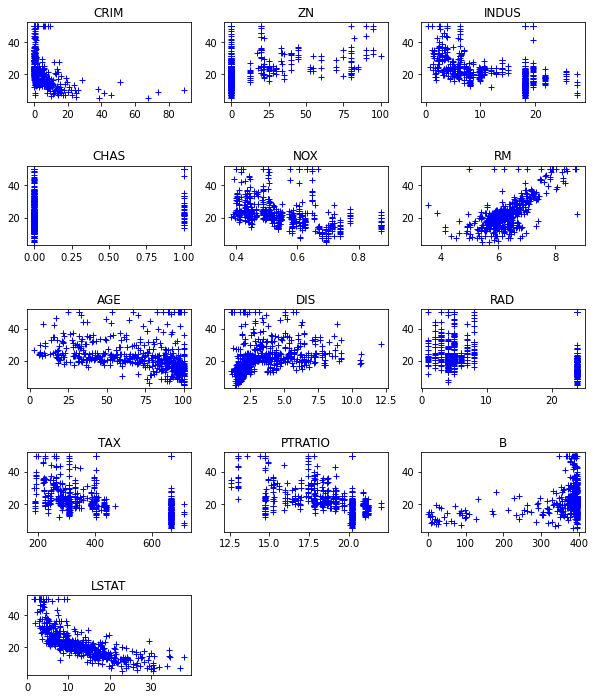

In [96]:
from sklearn import datasets
import math
import matplotlib.pyplot as plt
house = datasets.load_boston()
x = house.data
y = house.target
nums = len(house.feature_names)
columns = 3
rows = math.ceil(nums / columns)
plt.figure(figsize=(10,12))
for i in range(nums):
    plt.subplot(rows,columns,i+1)
    plt.plot(x[:,i],y,"b+")
    plt.title(house.feature_names[i])
plt.subplots_adjust(hspace=0.8)
plt.show()

误差为: 24.656936954384268


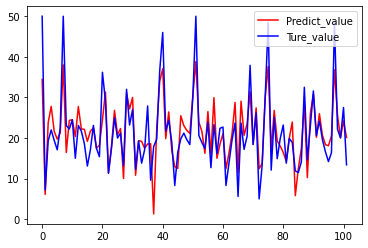

In [92]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
house = datasets.load_boston()
x = house.data
y = house.target
stand = StandardScaler()
stand_x = stand.fit_transform(x)
best = SelectKBest(f_regression,k=3)
best_x = best.fit_transform(stand_x,y)

train_x,test_x,train_y,test_y = train_test_split(best_x,y,test_size=0.2)
lr = LinearRegression()
lr.fit(train_x,train_y)
lr.predict(test_x)
predict_y = lr.predict(test_x)
error = mean_squared_error(test_y,predict_y)
print("误差为:",error)
plt.plot(predict_y,"r-",label="Predict_value")
plt.plot(test_y,"b-",label="Ture_value")
plt.legend()
plt.show()



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


card_df = pd.read_csv(r"C:\Users\78658\creditcard.csv")
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
from sklearn.model_selection import train_test_split
X_features = card_df.iloc[:, 1:-1]
y_target = card_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion Matrix')
    print(confusion)

    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [4]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

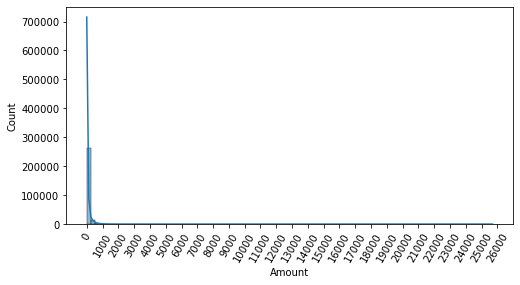

In [5]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [6]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=64, n_jobs=-1, boost_from_average=False, verbose= -1)
print('*Evaluation After Processing Data by LightGBM*')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

*Evaluation After Processing Data by LightGBM*
Confusion Matrix
[[85290     5]
 [   36   112]]
Accuracy: 0.9995, Precision: 0.9573, Recall: 0.7568,    F1: 0.8453, AUC:0.9788


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(card_df['Amount'].values.reshape(-1, 1))
card_df.drop(['Time','Amount'], axis=1)
card_df.insert(0, 'Amount_Scaled', amount_n)

In [8]:
X_features = card_df.iloc[:, :-1]
y_target = card_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
print('*Evaluation After Processing Data Variation by LightGBM*')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

*Evaluation After Processing Data Variation by LightGBM*
Confusion Matrix
[[85291     4]
 [   36   112]]
Accuracy: 0.9995, Precision: 0.9655, Recall: 0.7568,    F1: 0.8485, AUC:0.9792
